In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### generate clusters

In [2]:
c1_mean = 4
c1_std = 2
c2_mean = 0
c2_std = 2

train_c1_x = np.random.normal(c1_mean, c1_std, 100)
train_c1_y = np.random.normal(c1_mean, c1_std, 100)
train_c2_x = np.random.normal(c2_mean, c2_std, 100)
train_c2_y = np.random.normal(c2_mean, c2_std, 100)
test_c1_x = np.random.normal(c1_mean, c1_std, 100)
test_c1_y = np.random.normal(c1_mean, c1_std, 100)
test_c2_x = np.random.normal(c2_mean, c2_std, 100)
test_c2_y = np.random.normal(c2_mean, c2_std, 100)

train_c1 = np.vstack((train_c1_x, train_c1_y)).T
train_c2 = np.vstack((train_c2_x, train_c2_y)).T
test_c1 = np.vstack((test_c1_x, test_c1_y)).T
test_c2 = np.vstack((test_c2_x, test_c2_y)).T

##### plot the clusters

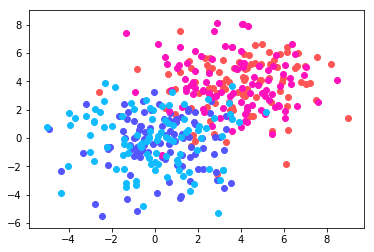

In [3]:
plt.scatter(*zip(*train_c1), c='#ff5555')
plt.scatter(*zip(*train_c2), c='#5555ff')
plt.scatter(*zip(*test_c1), c='#ff11bb')
plt.scatter(*zip(*test_c2), c='#11bbff')

plt.show()